In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
!pip show tensorflow

Name: tensorflow
Version: 2.8.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, protobuf, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, tf-estimator-nightly, typing-extensions, wrapt
Required-by: dopamine-rl


In [47]:
!pip uninstall tensorflow -y

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0


In [48]:
!pip install tensorflow==2.8


  Using cached tensorflow-2.8.0-cp310-cp310-manylinux2010_x86_64.whl (497.6 MB)


In [49]:
#1 DATA STUDY
#1º Import and create dataset
import pandas as pd
import numpy as np

path="/content/drive/MyDrive/Colab_Notebooks/KDDCup99/kdd-with-columns.csv"

df = pd.read_csv(path)
#print("Read {} rows.".format(len(df)))
df.dropna(inplace=True,axis=1) #Drop NAs (rows missing values)
#print(df.columns)

#Copy df to modify it
df_dataset=df

#Divide into two different datasets to study them
if 'outcome' in df_dataset.columns:
  df_labels=df_dataset["outcome"]
  df_dataset=df_dataset.drop("outcome", axis=1)
print(df_dataset.columns)
print(df_labels)
print(df_labels.unique())


#To study each feature
print("COLUMNS: Features")
i=0;
for t in df.dtypes.tolist():
  print(i, t)
  i+=1

#Number of columns
#print (df.shape[1])
print("DATASET")
print(df_dataset.shape[1])

#Types of attacks
AttackTypes = np.unique(df_labels)
print("TYPES OF ATTACKS")
print(AttackTypes)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')
0         normal.
1         normal.
2         normal.
3         normal.
4         normal.
           ...   
494016    normal.
494017    normal.
494018    norm

In [50]:
!pip install matplotlib


494021 rows
** duration:2495 (0%)
** protocol_type:[icmp:57.41%,tcp:38.47%,udp:4.12%]
** service:[ecr_i:56.96%,private:22.45%,http:13.01%,smtp:1.97%,other:1.46%,domain_u:1.19%,ftp_data:0.96%,eco_i:0.33%,ftp:0.16%,finger:0.14%,urp_i:0.11%,telnet:0.1%,ntp_u:0.08%,auth:0.07%,pop_3:0.04%,time:0.03%,csnet_ns:0.03%,remote_job:0.02%,gopher:0.02%,imap4:0.02%,discard:0.02%,domain:0.02%,iso_tsap:0.02%,systat:0.02%,shell:0.02%,echo:0.02%,rje:0.02%,whois:0.02%,sql_net:0.02%,printer:0.02%,nntp:0.02%,courier:0.02%,sunrpc:0.02%,netbios_ssn:0.02%,mtp:0.02%,vmnet:0.02%,uucp_path:0.02%,uucp:0.02%,klogin:0.02%,bgp:0.02%,ssh:0.02%,supdup:0.02%,nnsp:0.02%,login:0.02%,hostnames:0.02%,efs:0.02%,daytime:0.02%,link:0.02%,netbios_ns:0.02%,pop_2:0.02%,ldap:0.02%,netbios_dgm:0.02%,exec:0.02%,http_443:0.02%,kshell:0.02%,name:0.02%,ctf:0.02%,netstat:0.02%,Z39_50:0.02%,IRC:0.01%,urh_i:0.0%,X11:0.0%,tim_i:0.0%,pm_dump:0.0%,tftp_u:0.0%,red_i:0.0%]
** flag:[SF:76.6%,S0:17.61%,REJ:5.44%,RSTR:0.18%,RSTO:0.12%,SH:0.02%,S

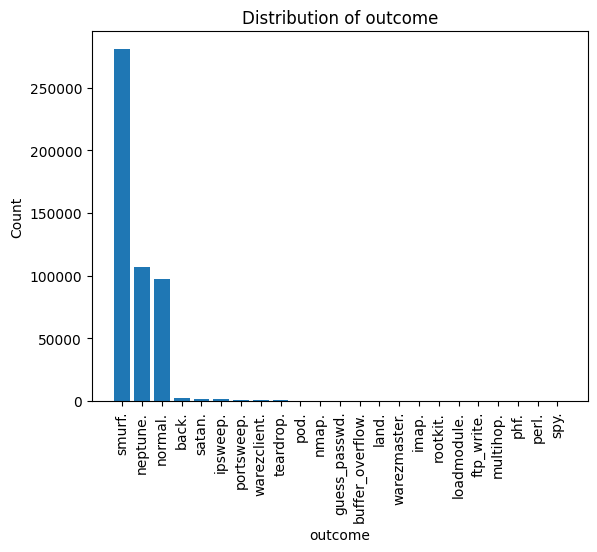

In [51]:
#3º Study of concepts
import pandas as pd
import os
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt


path="/content/drive/MyDrive/Colab_Notebooks/KDDCup99/kdd-with-columns.csv"
df = pd.read_csv(path)
#print("Read {} rows.".format(len(df)))
df.dropna(inplace=True,axis=1)

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))

def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,\
                int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

    #Filter only the attacks
    col = "outcome"

    uniques = df[col].unique()
    unique_count = len(uniques)
    if unique_count > 100:
        print("** {}:{} ({}%)".format(col, unique_count, int((unique_count / total) * 100)))
    else:
        print("** {}:{}".format(col, expand_categories(df[col])))
        category_counts = df[col].value_counts()

        # Graph
        fig, ax = plt.subplots()
        ax.bar(category_counts.index, category_counts.values)

        # Adjust axis x
        plt.xticks(rotation=90)

        #Show and plot graph
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.title('Distribution of {}'.format(col))
        plt.show()
analyze(df)

In [52]:
#4º Further study of features for concept selection
#service types
service_counts=df["service"].value_counts()
used_service_types = service_counts.sort_values(ascending=False)#mayor menor
for service_type, count in used_service_types.items():
  print(service_type, ',', count)

#Dur -> Threshold
dur_stat=df["duration"].describe()
print(dur_stat)

threshold=0.001
events=df[df['duration'] < threshold]
attacks = events[events['outcome'] != 'normal.']
normal = df[(df['duration'] < threshold) & (df['outcome'] == 'normal.')]
num_attacks = attacks.shape[0]
num_normal = normal.shape[0]
print("N events", len(events))
print("N attacks", num_attacks)
print("N normal", num_normal)

normal_events=df[df['duration'] > threshold]
normal_attacks = normal_events[normal_events['outcome'] != 'normal.']
normal_normal = df[(df['duration'] > threshold) & (df['outcome'] == 'normal.')]
num_normal_attacks = normal_attacks.shape[0]
num_normal_normal = normal_normal.shape[0]
print("N events", len(normal_events))
print("N attacks", num_normal_attacks)
print("N normal", num_normal_normal)


ecr_i , 281400
private , 110893
http , 64293
smtp , 9723
other , 7237
domain_u , 5863
ftp_data , 4721
eco_i , 1642
ftp , 798
finger , 670
urp_i , 538
telnet , 513
ntp_u , 380
auth , 328
pop_3 , 202
time , 157
csnet_ns , 126
remote_job , 120
gopher , 117
imap4 , 117
discard , 116
domain , 116
iso_tsap , 115
systat , 115
shell , 112
echo , 112
rje , 111
whois , 110
sql_net , 110
printer , 109
nntp , 108
courier , 108
mtp , 107
netbios_ssn , 107
sunrpc , 107
vmnet , 106
uucp_path , 106
uucp , 106
klogin , 106
bgp , 106
ssh , 105
supdup , 105
nnsp , 105
login , 104
hostnames , 104
efs , 103
daytime , 103
link , 102
netbios_ns , 102
ldap , 101
pop_2 , 101
netbios_dgm , 99
exec , 99
http_443 , 99
kshell , 98
name , 98
ctf , 97
netstat , 95
Z39_50 , 92
IRC , 43
urh_i , 14
X11 , 11
tim_i , 7
pm_dump , 1
tftp_u , 1
red_i , 1
count    494021.000000
mean         47.979302
std         707.746472
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       5

In [53]:
pip install tcav

In [54]:
# Necessary because jupyter restricts relative imports from parent directories
import os
if os.getcwd().split('/')[-1] != 'tcav':
    print(os.getcwd())
    os.chdir('../')
    os.chdir('../')
    os.chdir('../')
    print(os.getcwd())

/
/


In [55]:
from tensorflow.io import gfile
from tcav.utils import create_session

# 1º Make source directory para las siguientes operaciones
!rm -rf ./tcav/tcav_examples/discrete/kdd_sanity2/*
source_dir = "./tcav/tcav_examples/discrete/kdd_sanity2"
working_dir = source_dir

acts_dir = os.path.join(working_dir, "activations")
gfile.makedirs(acts_dir)

cav_dir = os.path.join(working_dir, "cav")
gfile.makedirs(cav_dir)

!ls ./tcav/tcav_examples/discrete/kdd_sanity2/

activations  cav


In [56]:
#2 MAKE CONCEPTS
import pandas as pd
import argparse
from tensorflow.io import gfile
import os


def make_concepts_targets_and_randoms(source_dir):
  path="/content/drive/MyDrive/Colab_Notebooks/KDDCup99/kdd-with-columns.csv"
  df = pd.read_csv(path)
  #print("Read {} rows.".format(len(df)))
  df.dropna(inplace=True,axis=1)

  #1º CONCEPT DEFINITION AND FOLDERS
  # Make concept folders with the csv files
  def make_concept_folder(df, concept):
    # Create the folder and save the dataframe as a csv file there
    path = os.path.join(source_dir, concept)
    if not gfile.exists(path):
      gfile.makedirs(path)

    concept_file_name = os.path.join(path, concept + ".csv")
    df.to_csv(concept_file_name, index=False)

  #ORIGINAL CONCEPTS
  """concept_less_df = df[df["dst_host_same_src_port_rate"] < 1]
  concept_more_df = df[df["dst_host_same_src_port_rate"] >= 1]
  make_concept_folder(concept_less_df, "dst_host_same_src_port_rate_less_than_one")
  make_concept_folder(concept_more_df, "dst_host_same_src_port_rate_more_than_one")
  """
  #PROTOCOL BASED CONCEPTS: TCP, UDP, ICMP
  tcp_df = df[df["protocol_type"] == "tcp"]
  udp_df = df[df["protocol_type"] == "udp"]
  icmp_df = df[df["protocol_type"] == "icmp"]
  make_concept_folder(tcp_df, "protocol_tcp")
  make_concept_folder(udp_df, "protocol_udp")
  make_concept_folder(icmp_df, "protocol_icmp")
  """#CONNECTION DURATION CONCEPTS
  umbral=0.01
  short_dur_df = df[df["duration"] > umbral]
  long_dur_df = df[df["duration"] < umbral]
  make_concept_folder(short_dur_df, "duration_short")
  make_concept_folder(long_dur_df, "duration_long")"""
  """#SERVICE TYPES CONCEPTS
  erci_df = df[df["service"] == "erc_i"]
  private_df = df[df["service"] == "private"]
  http_df = df[df["service"] == "http"]
  make_concept_folder(erci_df, "service_erci")
  make_concept_folder(private_df, "service_private")
  make_concept_folder(http_df, "service_http")"""
  #FLAG VALUES CONCEPTS: SF, S0, REJ
  SF_df = df[df["flag"] == "SF"]
  S0_df = df[df["flag"] == "S0"]
  REJ_df = df[df["flag"] == "REJ"]
  make_concept_folder(tcp_df, "flag_SF")
  make_concept_folder(udp_df, "flag_S0")
  make_concept_folder(icmp_df, "flag_REJ")
  #LOGGED_IN
  logged_in_df = df[df["logged_in"] == 0]
  logged_out_df = df[df["logged_in"] == 1]
  make_concept_folder(logged_in_df, "logged_in")
  make_concept_folder(logged_out_df, "logged_out")
  # SRC_BYTES CONCEPTS
  high_src_bytes_df = df[df["src_bytes"] > 0.001]
  low_src_bytes_df = df[df["src_bytes"] < 0.001]
  make_concept_folder(high_src_bytes_df, "src_bytes_high")
  make_concept_folder(low_src_bytes_df, "src_bytes_low")
  # DST_BYTES CONCEPTS
  high_dst_bytes_df = df[df["dst_bytes"] > 0.001]
  low_dst_bytes_df = df[df["dst_bytes"] < 0.001]
  make_concept_folder(high_dst_bytes_df, "dst_bytes_high")
  make_concept_folder(low_dst_bytes_df, "dst_bytes_low")
  #CONCEPTS
  concepts_protocol=["protocol_tcp", "protocol_udp", "protocol_icmp"]
  """concepts_dur=["duration_short", "duration_long"]
  concepts_service=["service_erci", "service_private", "service_http"]"""
  concepts_flag=["flag_SF", "flag_S0", "flag_REJ"]
  concepts_logged=["logged_in", "logged_out"]
  concepts_src=["src_bytes_high", "src_bytes_low"]
  concepts_dst=["dst_bytes_high", "dst_bytes_low"]
  #Print
  print("Available concepts for KDD99 dataset are: ")
  #print(["dst_host_same_src_port_rate_less_than_one", "dst_host_same_src_port_rate_more_than_one"])
  print(concepts_protocol)
  """  print(concepts_dur)
  print(concepts_service)"""
  print(concepts_flag)
  print(concepts_logged)
  print(concepts_src)
  print(concepts_dst)
  print("\n")

  #2º MAKE RANDOM EXAMPLES
  # Making random_examples
  random_size = 10
  random_partitions = 11
  for i in range(random_partitions):
    random_partition_name = "random500_" + str(i)
    randoms = df.sample(random_size)
    make_concept_folder(randoms, random_partition_name)
  print("Created 10 random folders \n")

  #3º MAKE LABELS.TXT WITH ALL ATTACK TYPES
  # Make target folder
  targets = df.outcome.unique()
  print("Available targets for KDD99 dataset are: ")
  print(targets)
  print("\n")
  for target in targets:
    target_df = df[df["outcome"] == target]
    make_concept_folder(target_df, target)
  # make labels
  with open(os.path.join(source_dir, "labels.txt"), "w") as the_file:
    for target in targets:
      the_file.write(target + "\n")

#4º IMPLEMENT FUNCTION
if not gfile.exists(source_dir):
  gfile.makedirs(os.path.join(source_dir))
  print("Created source directory at " + source_dir)
# Make data
make_concepts_targets_and_randoms(source_dir)
print("Successfully created data at " + source_dir)
!ls ./tcav/tcav_examples/discrete/kdd_sanity2


Available concepts for KDD99 dataset are: 
['protocol_tcp', 'protocol_udp', 'protocol_icmp']
['flag_SF', 'flag_S0', 'flag_REJ']
['logged_in', 'logged_out']
['src_bytes_high', 'src_bytes_low']
['dst_bytes_high', 'dst_bytes_low']


Created 10 random folders 

Available targets for KDD99 dataset are: 
['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']


Successfully created data at ./tcav/tcav_examples/discrete/kdd_sanity2
activations	  guess_passwd.  nmap.		random500_1   rootkit.
back.		  imap.		 normal.	random500_10  satan.
buffer_overflow.  ipsweep.	 perl.		random500_2   smurf.
cav		  labels.txt	 phf.		random500_3   spy.
dst_bytes_high	  land.		 pod.		random500_4   src_bytes_high
dst_bytes_low	  loadmodule.	 portsweep.	random500_5   src_bytes_low
flag_REJ	  logged_in	 protocol_icmp	ra

In [57]:
#3 CREATE MODEL

from __future__ import division
from __future__ import print_function

import os
import tensorflow as tf
import argparse
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.datasets
from sklearn.preprocessing import OrdinalEncoder

# Types of the columns in the dataset
kFloatIndices = [24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 37, 38, 39, 40]
kIntIndices = [
    0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
    31, 32
]
kBytesIndices = [1, 2, 3]

#1º PRE-PROCESS DATASET
def encode_variables(data):
  #Encodes categorical variables with Ordinal Encoding
  data2 = np.copy(data)#independent copy
  encoder = OrdinalEncoder()
  categorical_indices = kBytesIndices
  data2[:,
        categorical_indices] = encoder.fit_transform(data2[:,
                                                           categorical_indices])
  return data2


def encoding_function(x, label_path):
  #Matches a label's name with the index from the labels.txt file
  # Open label file and get indices
  with tf.io.gfile.GFile(label_path, 'r') as f:
    labels = [l.strip().split(' ')[0] for l in f.readlines()]
  return labels.index(x)

def encode_labels(labels, label_path):
  #Encoding labels according to order in the labels file, so it is compliant with ModelWrapper
  labels2 = np.copy(labels)
  encoded = [encoding_function(x, label_path) for x in labels2]
  return encoded

def create_categorical_map(data):
  categorical_indices = kBytesIndices
  # Takes form {index : number of unique values}
  categorical_map = {}
  for index in categorical_indices:
    categorical_map[index] = np.unique(data[:, [index]]).shape[0]
  return categorical_map

def prepare_dataset(labels_path):
  path="/content/drive/MyDrive/Colab_Notebooks/KDDCup99/kdd-with-columns.csv"
  df = pd.read_csv(path)
  df.dropna(inplace=True,axis=1) #Drop NAs (rows missing values)
  df_dataset=df
  if 'outcome' in df_dataset.columns:
    df_lablel=df_dataset["outcome"]
    df_dataset=df_dataset.drop("outcome", axis=1)

  data = np.array(df_dataset)
  labels = np.array(df_labels)
  encoded_data = encode_variables(data)
  encoded_labels = encode_labels(labels, labels_path)
  return encoded_data, encoded_labels

#2º CREATE MODEL
#Simple feedforward model with embedding representation for categorical variables
def make_keras_model(categorical_map):
  n_features = 41
  n_labels = 23
  # Make all placeholders
  inputs = []
  models = []

  input_layer = tf.keras.layers.Input(shape=(n_features,), name='input')
  inputs.append(input_layer)
  # Splits the input vector into multiple variables
  deconcat = tf.split(input_layer, [1 for i in range(n_features)], 1)
  for index in range(n_features):
    # For categorical variables, we create embedding layers
    if index in categorical_map.keys():
      vocab_size = categorical_map[index]
      inpt = deconcat[index]
      inputs.append(inpt)
      embed = tf.keras.layers.Embedding(vocab_size, 200, \
                                        trainable=True,
                                        embeddings_initializer=tf.compat.v1.initializers.random_normal())(inpt)

      embed_reshaped = tf.keras.layers.Reshape(target_shape=(200,))(embed)
      models.append(embed_reshaped)
    else:
      # Else, create a simple input for numerical features
      inpt = deconcat[index]
      inputs.append(inpt)
      models.append(inpt)
  # Concatenate them into a single vector
  merge_models = tf.keras.layers.concatenate(models)

  # Plug them into the DNN
  net = tf.keras.layers.Dense(1000)(merge_models)
  net = tf.keras.layers.BatchNormalization()(net)
  net = tf.keras.layers.Dense(256)(net)
  net = tf.keras.layers.BatchNormalization()(net)

  pred = tf.keras.layers.Dense(n_labels, activation='sigmoid')(net)
  model_full = tf.keras.models.Model(inputs=input_layer, \
                                     outputs=pred)
  model_full.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), \
                     metrics=['accuracy'],
                     optimizer='adam')
  return model_full

#3º TRAIN AND SAVE MODEL
def train_and_save_model(model_path, labels_path):
  # Prepare dataset and split it
  data, labels = prepare_dataset(labels_path)
  train_data, test_data, train_labels, test_labels = train_test_split(
      data, labels, test_size=0.2)

  train_data = np.array(train_data)
  test_data = np.array(test_data)
  train_labels = np.array(train_labels)
  test_labels = np.array(test_labels)

  # Create categorical map for the embedding layer
  categorical_map = create_categorical_map(data)
  model = make_keras_model(categorical_map)

  print(model.summary())
  model.fit(
      train_data,
      train_labels,
      validation_data=(test_data, test_labels),
      epochs=4,
      batch_size=64)
  model.save(model_path)

  # Test on a small subset of predictions
  predictions = model.predict(test_data[:10])
  print(predictions)


In [58]:
#4 MODEL WRAPPER
#from tcav.tcav_examples.discrete.kdd99_model import train_and_save_model
from tcav.model import KerasModelWrapper
import tensorflow as tf


class KDD99KerasModelWrapper(KerasModelWrapper):
  def __init__(self, sess, model_path, labels_path):
    if not tf.io.gfile.exists(labels_path):
      raise Exception(
          "Labels path does not exist. Please provide a labels file.")
    # Train a model if we have none
    if not tf.io.gfile.exists(model_path):
      train_and_save_model(model_path, labels_path)

    # Initialize the wrapper
    super(KDD99KerasModelWrapper, self).__init__(sess, model_path, labels_path)

    # Using SparseCategoricalCrossEntropy here
    self.y_input = tf.compat.v1.placeholder(tf.int64, shape=[None])
    self.loss = self.model.loss_functions[0](self.y_input,
                                             self.model.outputs[0])
    self._make_gradient_tensors()

In [59]:
# Call functions to create, train and save model
if os.path.exists("./tcav/tcav_examples/discrete/kdd_sanity2/kdd99_2.h5"):
  os.remove("./tcav/tcav_examples/discrete/kdd_sanity2/kdd99_2.h5")
label_path = os.path.join(source_dir, "labels.txt")
model_path = os.path.join(source_dir, "kdd99_2.h5")

uci_model = KDD99KerasModelWrapper(create_session(), model_path, label_path)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 41)]         0           []                               
                                                                                                  
 tf_op_layer_split (TensorFlowO  [(None, 1),         0           ['input[0][0]']                  
 pLayer)                         (None, 1),                                                       
                                 (None, 1),                                                       
                                 (None, 1),                                                       
                                 (None, 1),                                                       
                                 (None, 1),                                                   

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


None
Train on 395216 samples, validate on 98805 samples
Epoch 1/4
395200/395216 [============================>.] - ETA: 0s - loss: 0.0567 - accuracy: 0.9868

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


395216/395216 [==============================] - 99s 252us/sample - loss: 0.0567 - accuracy: 0.9868 - val_loss: 0.2001 - val_accuracy: 0.9813
Epoch 2/4
395216/395216 [==============================] - 92s 233us/sample - loss: 0.0293 - accuracy: 0.9899 - val_loss: 0.2072 - val_accuracy: 0.9815
Epoch 3/4
395216/395216 [==============================] - 92s 233us/sample - loss: 0.0243 - accuracy: 0.9897 - val_loss: 0.9850 - val_accuracy: 0.7629
Epoch 4/4
395216/395216 [==============================] - 98s 247us/sample - loss: 0.0212 - accuracy: 0.9901 - val_loss: 0.1497 - val_accuracy: 0.9824


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[9.95923102e-01 3.52016091e-02 8.76271725e-03 8.43906403e-03
  7.25236654e-01 8.48233700e-03 7.01019168e-03 7.37324357e-02
  3.56418788e-02 8.06067884e-02 2.62922645e-01 5.85237145e-03
  5.42830229e-02 4.80103791e-01 8.63555074e-03 4.91744578e-02
  1.28081292e-01 1.11969203e-01 6.37667775e-02 1.50775075e-01
  7.53262281e-01 2.33319402e-03 5.23437560e-02]
 [9.45409536e-01 8.36756825e-03 2.51054764e-03 1.56462193e-03
  8.72918367e-01 9.99987364e-01 6.98781013e-03 7.59059310e-01
  2.99524605e-01 2.89249122e-02 2.27847487e-01 2.60466337e-03
  1.06517673e-02 4.56728309e-01 2.01162696e-03 1.06602699e-01
  3.20878923e-02 9.75619853e-02 8.45336914e-03 4.42460775e-02
  2.16480941e-01 7.98583031e-04 8.08385015e-03]
 [9.89216149e-01 3.14781964e-02 9.95475054e-03 9.24295187e-03
  8.08363914e-01 1.06485754e-01 7.40009546e-03 1.59425020e-01
  2.36565769e-01 1.01915419e-01 3.55194867e-01 6.82660937e-03
  4.35139239e-02 3.68822992e-01 9.71335173e-03 1.31077021e-01
  8.00469220e-02 2.15553075e-01 4.69

In [60]:
#5 ACTIVATION VECTORS
import os
from tcav.activation_generator import DiscreteActivationGeneratorBase
#from tcav.tcav_examples.discrete.kdd99_model import encode_variables, kBytesIndices, kFloatIndices, kIntIndices
import numpy as np
import tensorflow as tf


class KDD99DiscreteActivationGenerator(DiscreteActivationGeneratorBase):
  def __init__(self, model, source_dir, acts_dir, max_examples):
    self.source_dir = source_dir
    super(KDD99DiscreteActivationGenerator,
          self).__init__(model, source_dir, acts_dir, max_examples)

  def load_data(self, concept):

    concept_folder = os.path.join(self.source_dir, concept)
    concept_file = os.path.join(concept_folder, concept + '.csv')
    with tf.io.gfile.GFile(concept_file, 'r') as f:
      texts = [
          l.strip().split(',') for l in f.readlines()[:self.max_examples + 1]
      ]
    texts = np.array(texts, dtype='O')
    texts = texts[1:]  # remove headers
    texts = texts[:, :-1]  # remove labels
    #texts = self._convert_types(texts)  # Assign proper data types
    return texts

  def transform_data(self, data):

    encoded_data = encode_variables(data)
    return encoded_data

  def _convert_types(self, texts):
    texts[:, kBytesIndices] = texts[:, kBytesIndices].astype(str)
    texts[:, kFloatIndices] = texts[:, kFloatIndices].astype(np.float32)
    texts[:, kIntIndices] = texts[:, kIntIndices].astype(np.int)
    return texts

In [61]:
#Call the activation vectors class
!rm -rf ./tcav/tcav_examples/discrete/kdd_sanity2/activations/*
!rm -rf ./tcav/tcav_examples/discrete/kdd_sanity2/cav/*
act_gen = KDD99DiscreteActivationGenerator(model=uci_model, source_dir=source_dir, acts_dir=acts_dir, max_examples=200)

Class = normal.
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.80 (+- 0.31), random was 0.47 (+- 0.45). p-val = 0.027 (significant)
    Bottleneck = dense_1. TCAV Score = 0.97 (+- 0.04), random was 0.55 (+- 0.42). p-val = 0.002 (significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 1.00 (+- 0.00), random was 0.47 (+- 0.45). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.87 (+- 0.26), random was 0.55 (+- 0.42). p-val = 0.019 (significant)
  Concept = protocol_icmp
    Bottleneck = dense. TCAV Score = 0.76 (+- 0.27), random was 0.47 (+- 0.45). p-val = 0.049 (significant)
    Bottleneck = dense_1. TCAV Score = 0.72 (+- 0.23), random was 0.55 (+- 0.42). p-val = 0.197 (not significant)
{'dense': {'bn_vals': [0.7995, 0.999, 0.76], 'bn_stds': [0.3125255989515099, 0.0030000000000000022, 0.26639256746388407], 'significant': [True, True, True]}, 'dense_1': {'bn_vals': [0.9744999999999999, 0.8714999999999999, 0.01], 'bn_stds': [0.0428047

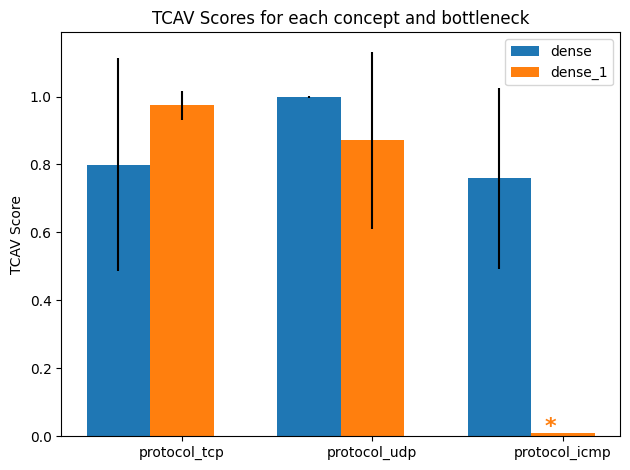

Class = neptune.
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.00 (+- 0.00), random was 0.52 (+- 0.50). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.00), random was 0.46 (+- 0.50). p-val = 0.005 (significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.00 (+- 0.00), random was 0.52 (+- 0.50). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.00), random was 0.46 (+- 0.50). p-val = 0.005 (significant)
  Concept = protocol_icmp
    Bottleneck = dense. TCAV Score = 0.00 (+- 0.00), random was 0.52 (+- 0.50). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.00), random was 0.46 (+- 0.50). p-val = 0.005 (significant)
{'dense': {'bn_vals': [0.0, 0.0, 0.0], 'bn_stds': [0.0, 0.0, 0.0], 'significant': [True, True, True]}, 'dense_1': {'bn_vals': [0.0, 0.0, 0.0], 'bn_stds': [0.0, 0.0, 0.0], 'significant': [True, True, True]}}


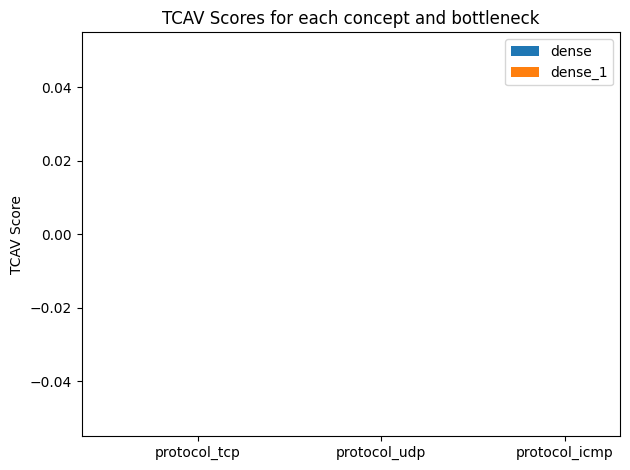

Class = smurf.
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.59 (+- 0.48), random was 0.57 (+- 0.48). p-val = 0.906 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.89 (+- 0.30), random was 0.48 (+- 0.49). p-val = 0.012 (significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.63 (+- 0.43), random was 0.57 (+- 0.48). p-val = 0.709 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.52 (+- 0.46), random was 0.48 (+- 0.49). p-val = 0.799 (not significant)
  Concept = protocol_icmp
    Bottleneck = dense. TCAV Score = 0.81 (+- 0.36), random was 0.57 (+- 0.48). p-val = 0.140 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.59 (+- 0.48), random was 0.48 (+- 0.49). p-val = 0.518 (not significant)
{'dense': {'bn_vals': [0.01, 0.01, 0.01], 'bn_stds': [0, 0, 0], 'significant': [False, False, False]}, 'dense_1': {'bn_vals': [0.889, 0.01, 0.01], 'bn_stds': [0.29668838871786, 0, 0], 'significant': [True, False, False]}}


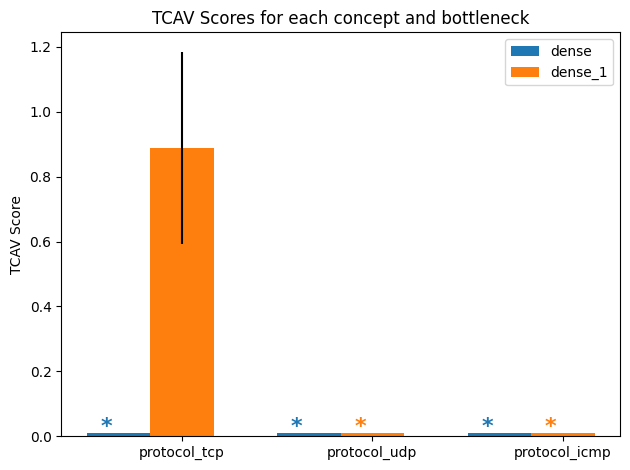

In [89]:
#6 TCAV EXPLAINABILITY
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Target traffic type
target1 = "normal."
target2 = "neptune."
target3 = "smurf."
#Different layers of the neural network
concepts_protocol=["protocol_tcp", "protocol_udp", "protocol_icmp"]
bottlenecks = ["dense", "dense_1" ]
#Evaluate the importance of the following conceepts
concepts = concepts_protocol
#Level of statistical tests to be performed
alphas = [0.01]


#files (CAV:  used to. measure the sensitivity if a given bottleneck to a given concept) are stored in cav_dir
my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

my_tcav3 = TCAV(create_session,
                   target3,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results3 = my_tcav3.run()

#Function that can be used to plot the results
utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)
utils_plot.plot_results(results3, num_random_exp=10)

Class = normal.
  Concept = flag_SF
    Bottleneck = dense. TCAV Score = 0.77 (+- 0.27), random was 0.51 (+- 0.44). p-val = 0.082 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.77 (+- 0.29), random was 0.50 (+- 0.40). p-val = 0.044 (significant)
  Concept = flag_S0
    Bottleneck = dense. TCAV Score = 0.97 (+- 0.09), random was 0.51 (+- 0.44). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.83 (+- 0.29), random was 0.50 (+- 0.40). p-val = 0.014 (significant)
  Concept = flag_REJ
    Bottleneck = dense. TCAV Score = 0.88 (+- 0.19), random was 0.51 (+- 0.44). p-val = 0.012 (significant)
    Bottleneck = dense_1. TCAV Score = 0.74 (+- 0.28), random was 0.50 (+- 0.40). p-val = 0.073 (not significant)
{'dense': {'bn_vals': [0.01, 0.9694999999999998, 0.8785000000000001], 'bn_stds': [0, 0.08984570106577165, 0.19406248993558747], 'significant': [False, True, True]}, 'dense_1': {'bn_vals': [0.7695, 0.829, 0.01], 'bn_stds': [0.28983141651656746, 0.285156097602699

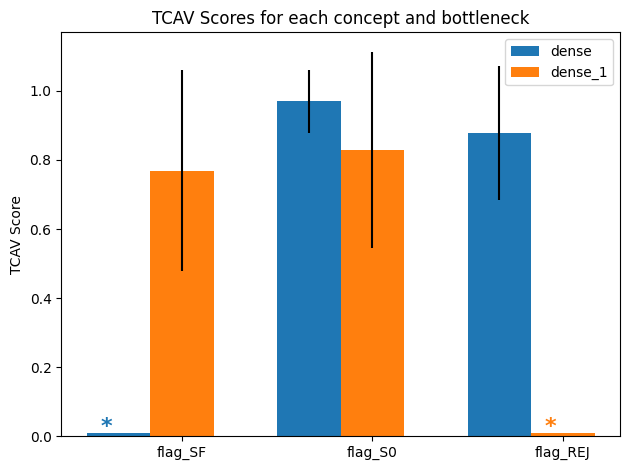

Class = neptune.
  Concept = flag_SF
    Bottleneck = dense. TCAV Score = 0.10 (+- 0.30), random was 0.48 (+- 0.50). p-val = 0.022 (significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.00), random was 0.49 (+- 0.50). p-val = 0.003 (significant)
  Concept = flag_S0
    Bottleneck = dense. TCAV Score = 0.00 (+- 0.00), random was 0.48 (+- 0.50). p-val = 0.003 (significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.00), random was 0.49 (+- 0.50). p-val = 0.003 (significant)
  Concept = flag_REJ
    Bottleneck = dense. TCAV Score = 0.00 (+- 0.00), random was 0.48 (+- 0.50). p-val = 0.003 (significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.00), random was 0.49 (+- 0.50). p-val = 0.003 (significant)
{'dense': {'bn_vals': [0.1, 0.0, 0.0], 'bn_stds': [0.30000000000000004, 0.0, 0.0], 'significant': [True, True, True]}, 'dense_1': {'bn_vals': [0.0, 0.0, 0.0], 'bn_stds': [0.0, 0.0, 0.0], 'significant': [True, True, True]}}


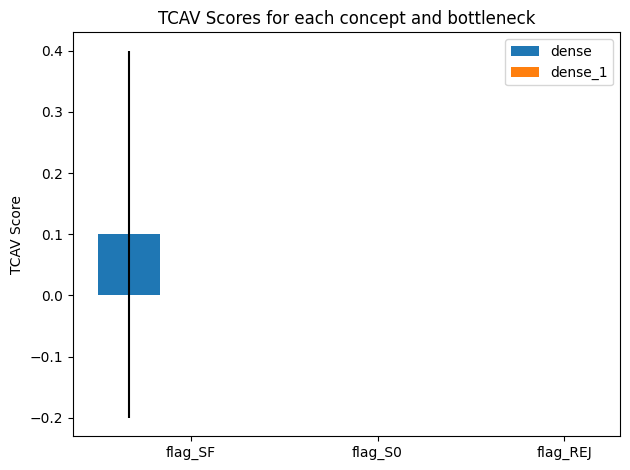

Class = smurf.
  Concept = flag_SF
    Bottleneck = dense. TCAV Score = 0.21 (+- 0.39), random was 0.49 (+- 0.49). p-val = 0.087 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.99 (+- 0.01), random was 0.55 (+- 0.48). p-val = 0.006 (significant)
  Concept = flag_S0
    Bottleneck = dense. TCAV Score = 0.99 (+- 0.01), random was 0.49 (+- 0.49). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.99 (+- 0.01), random was 0.55 (+- 0.48). p-val = 0.006 (significant)
  Concept = flag_REJ
    Bottleneck = dense. TCAV Score = 0.98 (+- 0.01), random was 0.49 (+- 0.49). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.89 (+- 0.30), random was 0.55 (+- 0.48). p-val = 0.038 (significant)
{'dense': {'bn_vals': [0.01, 0.99, 0.978], 'bn_stds': [0, 0.01072380529476362, 0.014525839046333963], 'significant': [False, True, True]}, 'dense_1': {'bn_vals': [0.99, 0.991, 0.8865000000000001], 'bn_stds': [0.011180339887498959, 0.01019803902718558, 0.295779056053

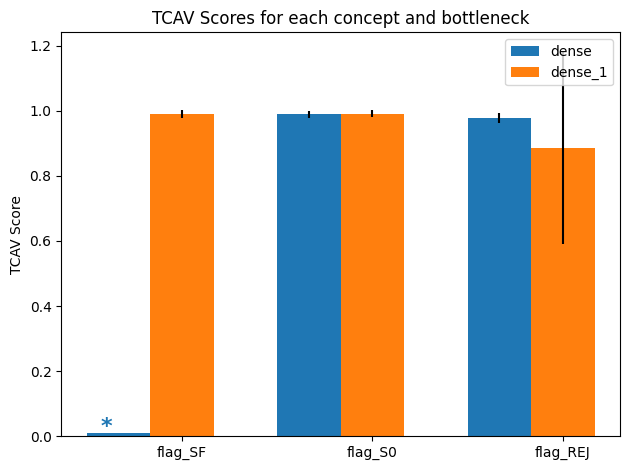

In [63]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Target traffic type
target1flag = "normal."
target2flag = "neptune."
target3flag = "smurf."
#Different layers of the neural network
bottlenecks = ["dense", "dense_1" ]
#Evaluate the importance of the following conceepts
concepts_flag=["flag_SF", "flag_S0", "flag_REJ"]
concepts = concepts_flag
#Level of statistical tests to be performed
alphas = [0.01]


#files (CAV:  used to. measure the sensitivity if a given bottleneck to a given concept) are stored in cav_dir
my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

#files (CAV:  used to. measure the sensitivity if a given bottleneck to a given concept) are stored in cav_dir
my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

#files (CAV:  used to. measure the sensitivity if a given bottleneck to a given concept) are stored in cav_dir
my_tcav3 = TCAV(create_session,
                   target3,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results3 = my_tcav3.run()

#Function that can be used to plot the results
utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)
utils_plot.plot_results(results3, num_random_exp=10)

Class = normal.
  Concept = logged_in
    Bottleneck = dense. TCAV Score = 0.99 (+- 0.02), random was 0.47 (+- 0.45). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 1.00 (+- 0.00), random was 0.55 (+- 0.42). p-val = 0.001 (significant)
  Concept = logged_out
    Bottleneck = dense. TCAV Score = 0.92 (+- 0.22), random was 0.47 (+- 0.45). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.95 (+- 0.07), random was 0.55 (+- 0.42). p-val = 0.003 (significant)
{'dense': {'bn_vals': [0.993, 0.9199999999999999], 'bn_stds': [0.020999999999999987, 0.21766947420343533], 'significant': [True, True]}, 'dense_1': {'bn_vals': [1.0, 0.9525], 'bn_stds': [0.0, 0.0669421391949794], 'significant': [True, True]}}


/usr/local/lib/python3.10/dist-packages/tcav/utils_plot.py:96: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  _, p_val = ttest_ind(random_i_ups[bottleneck], i_ups)


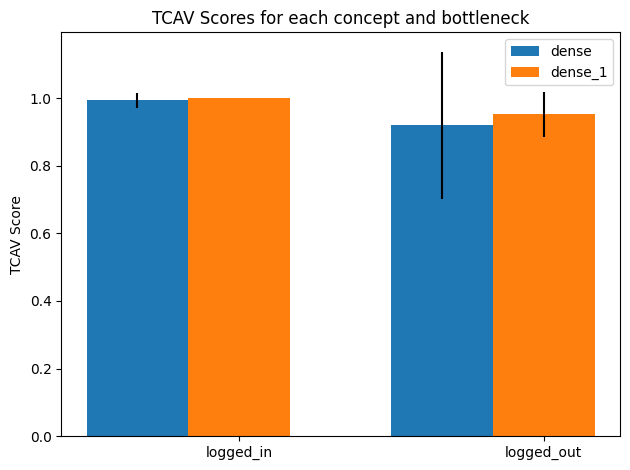

Class = neptune.
  Concept = logged_in
    Bottleneck = dense. TCAV Score = 0.10 (+- 0.30), random was 0.52 (+- 0.50). p-val = 0.011 (significant)
    Bottleneck = dense_1. TCAV Score = 0.10 (+- 0.30), random was 0.46 (+- 0.50). p-val = 0.031 (significant)
  Concept = logged_out
    Bottleneck = dense. TCAV Score = 0.00 (+- 0.00), random was 0.52 (+- 0.50). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.00), random was 0.46 (+- 0.50). p-val = 0.005 (significant)
{'dense': {'bn_vals': [0.1, 0.0], 'bn_stds': [0.30000000000000004, 0.0], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.1, 0.0], 'bn_stds': [0.30000000000000004, 0.0], 'significant': [True, True]}}


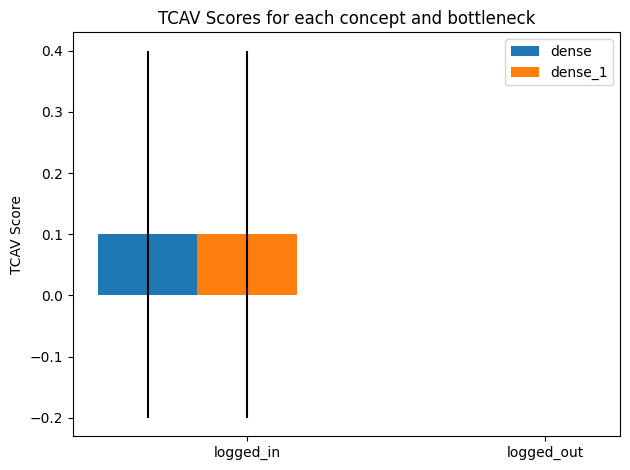

Class = smurf.
  Concept = logged_in
    Bottleneck = dense. TCAV Score = 0.10 (+- 0.30), random was 0.57 (+- 0.48). p-val = 0.004 (significant)
    Bottleneck = dense_1. TCAV Score = 0.23 (+- 0.38), random was 0.48 (+- 0.49). p-val = 0.125 (not significant)
  Concept = logged_out
    Bottleneck = dense. TCAV Score = 0.31 (+- 0.45), random was 0.57 (+- 0.48). p-val = 0.109 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.70 (+- 0.44), random was 0.48 (+- 0.49). p-val = 0.178 (not significant)
{'dense': {'bn_vals': [0.1, 0.01], 'bn_stds': [0.30000000000000004, 0], 'significant': [True, False]}, 'dense_1': {'bn_vals': [0.01, 0.01], 'bn_stds': [0, 0], 'significant': [False, False]}}


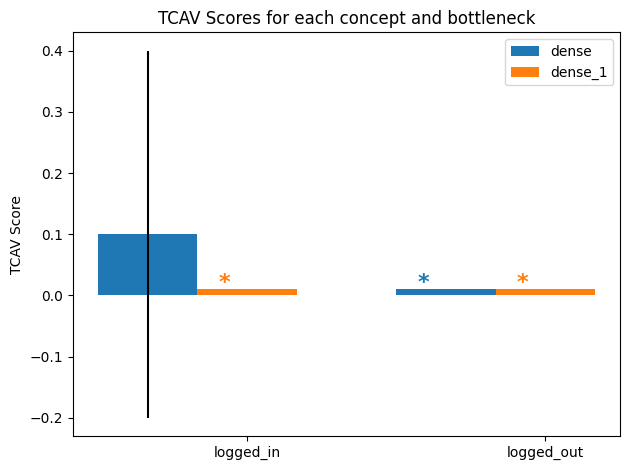

In [90]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Target traffic type
target1 = "normal."
target2 = "neptune."
target3 = "smurf."
#Different layers of the neural network
bottlenecks = ["dense", "dense_1" ]
#Evaluate the importance of the following conceepts
concepts_logged=["logged_in", "logged_out"]
concepts = concepts_logged
#Level of statistical tests to be performed
alphas = [0.01]


#files (CAV:  used to. measure the sensitivity if a given bottleneck to a given concept) are stored in cav_dir
my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

#files (CAV:  used to. measure the sensitivity if a given bottleneck to a given concept) are stored in cav_dir
my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

#files (CAV:  used to. measure the sensitivity if a given bottleneck to a given concept) are stored in cav_dir
my_tcav3 = TCAV(create_session,
                   target3,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results3 = my_tcav3.run()

#Function that can be used to plot the results
utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)
utils_plot.plot_results(results3, num_random_exp=10)

Class = normal.
  Concept = src_bytes_high
    Bottleneck = dense. TCAV Score = 0.79 (+- 0.28), random was 0.47 (+- 0.45). p-val = 0.030 (significant)
    Bottleneck = dense_1. TCAV Score = 0.98 (+- 0.03), random was 0.55 (+- 0.42). p-val = 0.002 (significant)
  Concept = src_bytes_low
    Bottleneck = dense. TCAV Score = 0.12 (+- 0.24), random was 0.47 (+- 0.45). p-val = 0.016 (significant)
    Bottleneck = dense_1. TCAV Score = 0.51 (+- 0.26), random was 0.55 (+- 0.42). p-val = 0.796 (not significant)
{'dense': {'bn_vals': [0.7905, 0.1155], 'bn_stds': [0.2780148377335282, 0.24060808382097226], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.982, 0.01], 'bn_stds': [0.03429285639896448, 0], 'significant': [True, False]}}


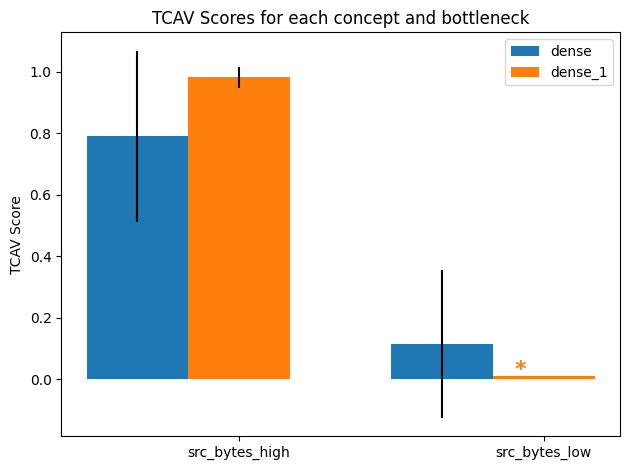

Class = neptune.
  Concept = src_bytes_high
    Bottleneck = dense. TCAV Score = 0.00 (+- 0.00), random was 0.52 (+- 0.50). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.00), random was 0.46 (+- 0.50). p-val = 0.005 (significant)
  Concept = src_bytes_low
    Bottleneck = dense. TCAV Score = 0.00 (+- 0.00), random was 0.52 (+- 0.50). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.00), random was 0.46 (+- 0.50). p-val = 0.005 (significant)
{'dense': {'bn_vals': [0.0, 0.0], 'bn_stds': [0.0, 0.0], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.0, 0.0], 'bn_stds': [0.0, 0.0], 'significant': [True, True]}}


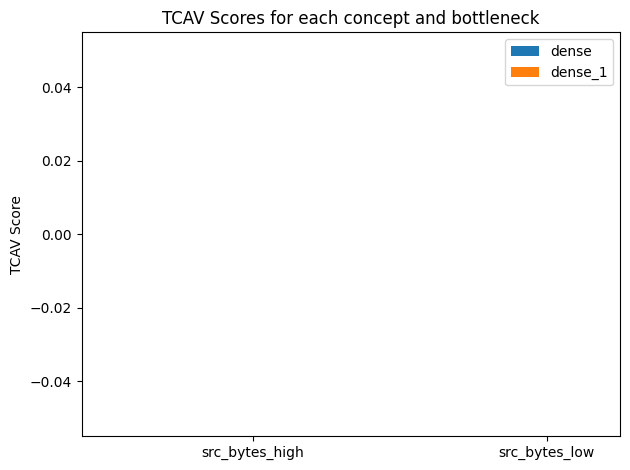

Class = smurf.
  Concept = src_bytes_high
    Bottleneck = dense. TCAV Score = 0.49 (+- 0.49), random was 0.57 (+- 0.48). p-val = 0.600 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.70 (+- 0.43), random was 0.48 (+- 0.49). p-val = 0.177 (not significant)
  Concept = src_bytes_low
    Bottleneck = dense. TCAV Score = 1.00 (+- 0.00), random was 0.57 (+- 0.48). p-val = 0.007 (significant)
    Bottleneck = dense_1. TCAV Score = 0.89 (+- 0.30), random was 0.48 (+- 0.49). p-val = 0.012 (significant)
{'dense': {'bn_vals': [0.01, 1.0], 'bn_stds': [0, 0.0], 'significant': [False, True]}, 'dense_1': {'bn_vals': [0.01, 0.8895], 'bn_stds': [0, 0.2968202317902201], 'significant': [False, True]}}


/usr/local/lib/python3.10/dist-packages/tcav/utils_plot.py:96: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  _, p_val = ttest_ind(random_i_ups[bottleneck], i_ups)


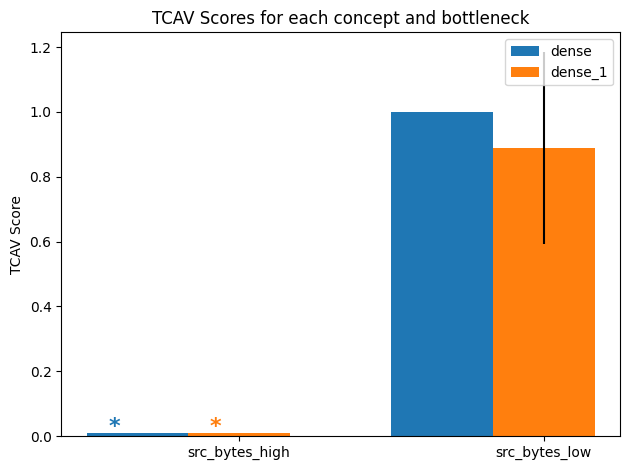

In [91]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Target traffic type
target1 = "normal."
target2 = "neptune."
target3 = "smurf."
#Different layers of the neural network
bottlenecks = ["dense", "dense_1" ]
#Evaluate the importance of the following conceepts
concepts_src=["src_bytes_high", "src_bytes_low"]
concepts = concepts_src
#Level of statistical tests to be performed
alphas = [0.01]


#files (CAV:  used to. measure the sensitivity if a given bottleneck to a given concept) are stored in cav_dir
my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

#files (CAV:  used to. measure the sensitivity if a given bottleneck to a given concept) are stored in cav_dir
my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

#files (CAV:  used to. measure the sensitivity if a given bottleneck to a given concept) are stored in cav_dir
my_tcav3 = TCAV(create_session,
                   target3,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results3 = my_tcav3.run()

#Function that can be used to plot the results
utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)
utils_plot.plot_results(results3, num_random_exp=10)

Class = normal.
  Concept = dst_bytes_high
    Bottleneck = dense. TCAV Score = 0.73 (+- 0.36), random was 0.47 (+- 0.45). p-val = 0.083 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.90 (+- 0.28), random was 0.55 (+- 0.42). p-val = 0.011 (significant)
  Concept = dst_bytes_low
    Bottleneck = dense. TCAV Score = 0.99 (+- 0.02), random was 0.47 (+- 0.45). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.99 (+- 0.03), random was 0.55 (+- 0.42). p-val = 0.001 (significant)
{'dense': {'bn_vals': [0.01, 0.9949999999999999], 'bn_stds': [0, 0.015000000000000015], 'significant': [False, True]}, 'dense_1': {'bn_vals': [0.9, 0.991], 'bn_stds': [0.2790071683666927, 0.025377155080899032], 'significant': [True, True]}}


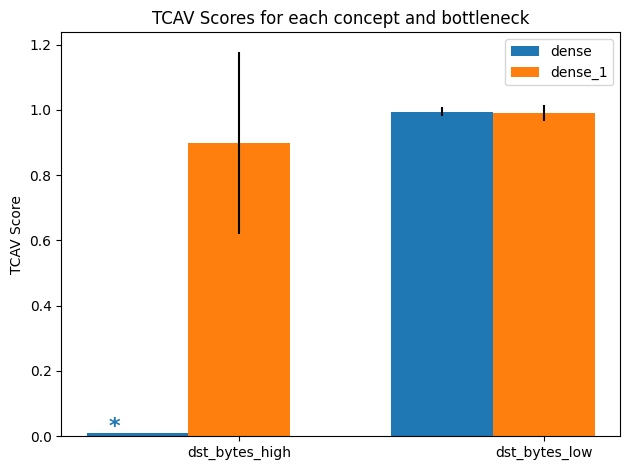

Class = neptune.
  Concept = dst_bytes_high
    Bottleneck = dense. TCAV Score = 0.00 (+- 0.00), random was 0.52 (+- 0.50). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.00), random was 0.46 (+- 0.50). p-val = 0.005 (significant)
  Concept = dst_bytes_low
    Bottleneck = dense. TCAV Score = 0.10 (+- 0.30), random was 0.52 (+- 0.50). p-val = 0.011 (significant)
    Bottleneck = dense_1. TCAV Score = 0.20 (+- 0.40), random was 0.46 (+- 0.50). p-val = 0.124 (not significant)
{'dense': {'bn_vals': [0.0, 0.1], 'bn_stds': [0.0, 0.30000000000000004], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.0, 0.01], 'bn_stds': [0.0, 0], 'significant': [True, False]}}


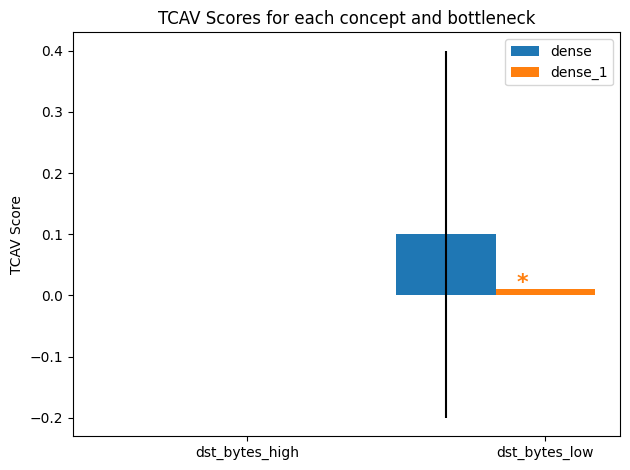

Class = smurf.
  Concept = dst_bytes_high
    Bottleneck = dense. TCAV Score = 0.79 (+- 0.40), random was 0.57 (+- 0.48). p-val = 0.171 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.71 (+- 0.42), random was 0.48 (+- 0.49). p-val = 0.164 (not significant)
  Concept = dst_bytes_low
    Bottleneck = dense. TCAV Score = 0.11 (+- 0.29), random was 0.57 (+- 0.48). p-val = 0.004 (significant)
    Bottleneck = dense_1. TCAV Score = 0.39 (+- 0.48), random was 0.48 (+- 0.49). p-val = 0.563 (not significant)
{'dense': {'bn_vals': [0.01, 0.1115], 'bn_stds': [0, 0.2860423919631494], 'significant': [False, True]}, 'dense_1': {'bn_vals': [0.01, 0.01], 'bn_stds': [0, 0], 'significant': [False, False]}}


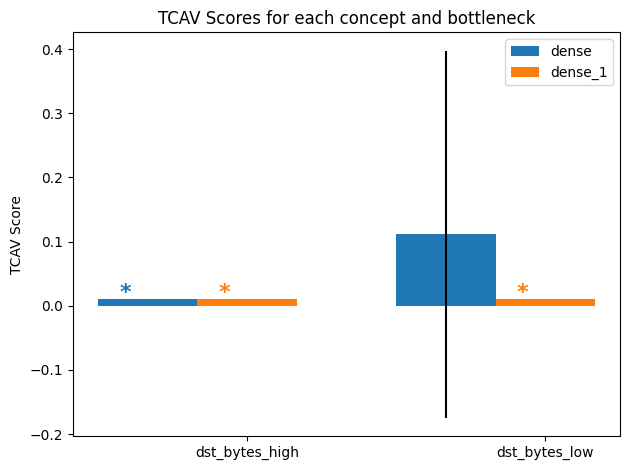

In [88]:

from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Target traffic type
target1 = "normal."
target2 = "neptune."
target3 = "smurf."
#Different layers of the neural network
bottlenecks = ["dense", "dense_1" ]
#Evaluate the importance of the following conceepts
concepts_dst=["dst_bytes_high", "dst_bytes_low"]
concepts = concepts_dst
#Level of statistical tests to be performed
alphas = [0.01]


#files (CAV:  used to. measure the sensitivity if a given bottleneck to a given concept) are stored in cav_dir
my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

#files (CAV:  used to. measure the sensitivity if a given bottleneck to a given concept) are stored in cav_dir
my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

#files (CAV:  used to. measure the sensitivity if a given bottleneck to a given concept) are stored in cav_dir
my_tcav3 = TCAV(create_session,
                   target3,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results3 = my_tcav3.run()

#Function that can be used to plot the results
utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)
utils_plot.plot_results(results3, num_random_exp=10)